In [ ]:
from sklearn.datasets import load_digits
data = load_digits()
print(data.keys())

In [ ]:
# Data shape & statistics
print("Data: ", data['data'].shape)
print("Label:", data['target'].shape)

import numpy as np
for c in range(10):
  print('Class', c, 'Number:', np.sum(data['target']==c))

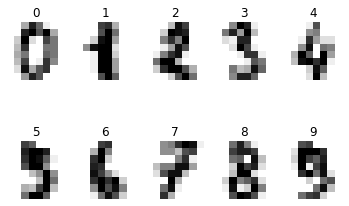

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in range(10):
  i = 0
  while(1):
    if data['target'][i]==c:
      plt.subplot(2,5,c+1)
      plt.axis('off')
      plt.imshow(data['data'][i].reshape(8,8), cmap = plt.cm.gray_r)
      plt.title(c)
      break
    i+=1

In [ ]:
test_indices, train_indices = [],[]
num = [0] * 10 #class counting array
for i in range(len(data['target'])):
  if num[data['target'][i]] < 20: #test data 뽑는 과정
    test_indices.append(i)
    num[data['target'][i]] += 1
  else:
    train_indices.append(i)

train_data = data['data'][train_indices]
train_target = data['target'][train_indices]

test_data = data['data'][test_indices]
test_target = data['target'][test_indices]

print(test_data.shape)
print(train_data.shape)

(200, 64)
(1597, 64)


In [ ]:
train_data23 = train_data[(train_target == 2) | (train_target == 3)]
train_target23 = train_target[(train_target == 2) | (train_target == 3)]
test_data23 = test_data[(test_target == 2) | (test_target == 3)]
test_target23 = test_target[(test_target == 2) | (test_target == 3)]

print(test_data23.shape)
print(train_data23.shape)

(40, 64)
(320, 64)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

LR = LogisticRegression(max_iter=1000, solver='sag') # backprop 안하는 모델
NN = MLPClassifier(hidden_layer_sizes=(10), activation='relu', learning_rate_init=0.01, max_iter= 1000) #backprop

In [ ]:
LR = LogisticRegression(max_iter=1, solver='sag')
LR.fit(train_data23, train_target23)

train_predict23 = LR.predict(train_data23)
test_predict23 = LR.predict(test_data23)
print("test_target     :", test_target23)
print("test_prediction :", test_predict23)

train_acc23 = np.sum(train_target23 == train_predict23) / len(train_target23)
test_acc23 = np.sum(test_target23 == test_predict23) / len(test_target23)

print("train_acc :", train_acc23)
print("test_acc  :", test_acc23)

test_target     : [2 3 2 3 2 3 3 2 2 2 2 3 3 3 3 2 2 3 2 3 3 3 3 2 2 2 2 3 2 3 2 3 3 2 2 2 2
 3 3 3]
test_prediction : [2 3 2 3 2 3 3 2 2 2 2 3 3 3 3 2 3 3 2 3 3 3 3 2 2 2 2 3 2 3 2 3 3 2 2 2 2
 3 3 3]
train_acc : 0.990625
test_acc  : 0.975


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
NN23 = MLPClassifier(hidden_layer_sizes = (10), activation = 'relu', learning_rate_init = 0.01, max_iter = 1)
NN23.fit(train_data23, train_target23)

train_predict23 = NN23.predict(train_data23)
test_predict23 = NN23.predict(test_data23)
print("test_target     :", test_target23)
print("test_prediction :", test_predict23)

train_acc23 = np.sum(train_target23 == train_predict23) / len(train_target23)
test_acc23 = np.sum(test_target23 == test_predict23) / len(test_target23)

print("train_acc :", train_acc23)
print("test_acc  :", test_acc23)

test_target     : [2 3 2 3 2 3 3 2 2 2 2 3 3 3 3 2 2 3 2 3 3 3 3 2 2 2 2 3 2 3 2 3 3 2 2 2 2
 3 3 3]
test_prediction : [2 3 3 2 3 2 2 2 2 2 2 3 2 2 3 2 2 2 3 2 3 2 3 3 2 2 3 2 3 2 3 2 2 3 3 3 3
 2 2 2]
train_acc : 0.33125
test_acc  : 0.35


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
import joblib
import os

if not os.path.exists('models'):
    os.makedirs('models')
    
joblib.dump(NN23, 'models/NN23.joblib') 

NN23_load = joblib.load('models/NN23.joblib') 

train_predict23 = NN23_load.predict(train_data23)
test_predict23 = NN23_load.predict(test_data23)
print("test_target     :", test_target23)
print("test_prediction :", test_predict23)

train_acc23 = np.sum(train_target23 == train_predict23) / len(train_target23)
test_acc23= np.sum(test_target23 == test_predict23) / len(test_target23)
print("train_acc :", train_acc23)
print("test_acc  :", test_acc23)

In [ ]:
NN = MLPClassifier(hidden_layer_sizes = (512, 256, 256), activation = 'relu', learning_rate_init = 0.001, max_iter = 50)
NN.fit(train_data, train_target)

train_predict = NN.predict(train_data)

train_acc = np.sum(train_target == train_predict) / len(train_target)

print("train_acc :", train_acc)

train_acc : 1.0
test_acc  : 0.98


In [ ]:
joblib.dump(NN, 'models/NN.joblib') 
NN_load = joblib.load('models/NN.joblib') 

test_predict = NN.predict(test_data)
test_acc = np.sum(test_target == test_predict) / len(test_target)

print("test_acc :", test_acc)

test_acc : 0.98


먼저, Hidden layer의 개수, 그리고 unit의 개수가 충분하지 않다고 판단되어 layer 및 unit 개수를 계속 늘려보면서 정확도를 비교해보았습니다. # of layers를 1개, 2개, 3개, 4개 등으로 늘려보았고,  # of units는 16, 32, 64, 128, 256, 512, 1024등으로 바꿔가면서 각 조합별로 10번의 시행을 해보았습니다.  # of layers는 3개, # of units는 (512, 256, 256)일 때 평균적으로 가장 좋은 정확도를 보였습니다. 두 hyperparameter의 숫자가 너무 클 때, training accuracy는 100%가 나왔지만, validation accuracy는 변동도 크고, 원하는 정확도 만큼 나오지 않았습니다. training data에 대해 Overfitting이 일어났다고 판단했습니다.


그 다음, learning rate를 0.1부터 0.01, 0.001, 0.0001 등으로 변화시키면서 시행해보았습니다. (논문을 찾아보니 learning rate를 지수꼴로 다양하게 테스트해보는게 좋다는 언급이 많았습니다.) 여러 번 테스트해보니 시행마다 정확도 차이가 많이 났는데, 0.001일 때 가장 그 차이가 적었고, 정확도 역시 크게 나왔습니다.


마지막으로 iteration 횟수를 조절해보았습니다. max_iter 역시 overfitting 및 underfitting에 큰 영향을 주는 요소입니다. 위에서 결정한 hyperparameters로 시행을 돌려보니 training accuracy는 계속해서 100%가 나왔지만, validation accuracy는 95% 정도가 나왔습니다. 따라서, training accuracy가 크게 떨어지지 않는 선에서, max_iter변수를 1000부터 500, 100, 50 등으로 계속 줄여나가보았습니다.(Overfitting 방지를 위해) max_iter = 40일 때 가장 좋은 정확도를 계속해서 보여주었습니다.

이렇게 # of layers, # of units, learning rate, max_iteration 이 4가지의 hyperparameter tuning을 통해 정확도 0.98을 나타내는 모델을 만들 수 있었습니다.